In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#First we create a path to the original dataset and an additional path to a new dataset in case additional expense entries are added from the user
# Define the file paths
#The dataset we use is an example of a expense sheet which can typically be downloaded from Online Banking apps e.g. UBS and CS

ORIGINAL_FILE_PATH = 'Expenses_November_2023.csv'
TEMP_FILE_PATH = 'Temp_Expenses_November_2023.csv'


In [56]:
# First we define all the functions we will need for the tool
# Function to read the original dataset

def read_dataset(file_path):
    try:
        return pd.read_csv(file_path) 

    # Create cases in case the fil is not correct
    
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        exit()
    except pd.errors.ParserError:
        print(f"Error parsing file: {file_path}")
        exit()

# We want the user to be able to see his total expenses per category
# Function to display summary of expenses per category

def display_expenses_summary(df):
    summary = df.groupby('Category')['Amount'].sum().reset_index()
    print("\nSummary of expenses by category:")
    print(summary)
    total_spent = summary['Amount'].sum()
    print(f"\nTotal spent in the past month: {total_spent:.2f}")

    
# Function to add a new entry to the dataset
# Allow user to enter additional expense entries if he wants

def add_new_entry(df):
    while True:
        try:
            date = input("Enter the date of the expense (YYYY-MM-DD): ")
            datetime.strptime(date, "%Y-%m-%d")  # Validate date format
            category = input("Enter expense category: ")
            amount = float(input("Enter the expense amount: "))
            
            #create scenarios if the input amount or format is not correct
            
            if amount < 0:
                raise ValueError("The amount cannot be negative.")
            new_entry = pd.DataFrame({'Date': [date], 'Category': [category], 'Amount': [amount]})
            return df.append(new_entry, ignore_index=True)
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

# Function to save the new dataset

def save_dataset(df, file_path):
    df.to_csv(file_path, index=False)

# Function to plot the pie chart

def plot_pie_chart(df):
    
    # Create exception case
    
    if df.empty:
        print("No data available to plot.")
        return

    # Add correct formatting and colour palette 
    
    category_expenses = df.groupby('Category')['Amount'].sum()
    sorted_expenses = category_expenses.sort_values()
    colors = sns.color_palette("Blues", n_colors=len(sorted_expenses))

    plt.figure(figsize=(10, 8))
    plt.pie(sorted_expenses, labels=sorted_expenses.index, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title('Expenses by Category')
    plt.axis('equal')  
    plt.show()

# Function to plot cumulative spending over time

def plot_cumulative_spending(df):
    if df.empty:
        print("No data available to plot.")
        return

    df['Date'] = pd.to_datetime(df['Date'])
    df_sorted = df.sort_values(by='Date')
    df_sorted['Cumulative Expense'] = df_sorted['Amount'].cumsum()
    colors = sns.color_palette("Blues", as_cmap=True)

    plt.figure(figsize=(12, 6))
    plt.plot(df_sorted['Date'], df_sorted['Cumulative Expense'], color='blue', marker='o')
    plt.title('Cumulative Spending Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Expense')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Function to plot day-by-day expenses

def plot_day_by_day_expenses(df):
    if df.empty:
        print("No data available to plot.")
        return

    df['Date'] = pd.to_datetime(df['Date'])
    df_sorted = df.sort_values(by='Date')
    colors = sns.color_palette("Blues", as_cmap=True)

    plt.figure(figsize=(12, 6))
    plt.plot(df_sorted['Date'], df_sorted['Amount'], color='blue', marker='o')
    plt.title('Day-by-Day Expenses')
    plt.xlabel('Date')
    plt.ylabel('Expense')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Function to collect budget data

def collect_budget_data(categories):
    budgets = {}
    print("\nEnter budget for next month for each category:")
    for category in categories:
        while True:
            try:
                budget = float(input(f"Budget for {category} next month: "))
                if budget < 0:
                    raise ValueError("The budget cannot be negative.")
                budgets[category] = budget
                break
            except ValueError:
                print("Invalid input. Please enter a valid number.")
    return budgets

# We want to create a function which compares the total budget to actual expenses and give recommendations on how to save money if over budget or congratulate the user  if under budget 

def compare_budget_expenses(expenses, budgets):
    
    # Plot the Budget vs Acual barchart 
    
    expenses_summary = expenses.groupby('Category')['Amount'].sum()
    budget_df = pd.DataFrame.from_dict(budgets, orient='index', columns=['Budget'])
    budget_df['Expenses'] = expenses_summary
    budget_df['Difference'] = budget_df['Budget'] - budget_df['Expenses']

    
    budget_df[['Budget', 'Expenses']].plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title("Expenses vs Budget")
    plt.ylabel("Amount")
    plt.xlabel("Category")
    plt.show()

    # Calculate the total difference and provide overall feedback
    
    total_difference = budget_df['Difference'].sum()
    over_budget = budget_df[budget_df['Difference'] < 0]

    if total_difference < 0:
        print("\nRecommendations to stay on budget in December:")
        for category, row in over_budget.iterrows():
            print(f"- Reduce spending in {category}: Over by {abs(row['Difference']):.2f}")
    elif not over_budget.empty:
        print("\nCongratulations! You are under the total budget.")
        print("However, you have exceeded the budget in the following categories:")
        for category, row in over_budget.iterrows():
            print(f"- {category}: Budget was {row['Budget']}, Expenses were {row['Expenses']}, Over by {abs(row['Difference']):.2f}")
    else:
        print(f"\nCongratulations! You are under the total budget by {total_difference:.2f}.")


Summary of expenses by category:
                                 Category  Amount
0                                    Food    28.3
1                                   Other   151.8
2                                  Health   224.8
3             Food & non-alcoholic drinks    95.8
4              Housing(net), fuel & power   281.5
5          Miscellaneous goods & services   110.3
6                           Communication   389.1
7                               Education   255.3
8                     Clothing & footwear   137.4
9              Household goods & services   254.6
10                              Transport    77.9
11                   Recreation & culture   271.2
12                   Restaurants & hotels   138.4
13  Alcoholic drinks, tobacco & narcotics    83.4

Total spent in the past month: 2499.80

Is your dataset complete? (yes/no)


 no
Enter the date of the expense (YYYY-MM-DD):  2023-11-20
Enter expense category:  Food
Enter the expense amount:  250


<ipython-input-56-0554ec657cd4>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Is your dataset complete? (yes/no)


 yes



Enter budget for next month for each category:


Budget for Food next month:  150
Budget for Other next month:  150
Budget for Health next month:  200
Budget for Food & non-alcoholic drinks next month:  200
Budget for Housing(net), fuel & power next month:  200
Budget for Miscellaneous goods & services next month:  500
Budget for Communication next month:  300
Budget for Education next month:  100
Budget for Clothing & footwear next month:  400
Budget for Household goods & services next month:  300
Budget for Transport next month:  200
Budget for Recreation & culture next month:  200
Budget for Restaurants & hotels next month:  250
Budget for Alcoholic drinks, tobacco & narcotics next month:  10



Choose an option:
1: Pie Chart
2: Cumulative Spending Chart
3: Day-by-Day Expenses Line Chart
4: Compare Expenses with Budget
5: Exit


 4


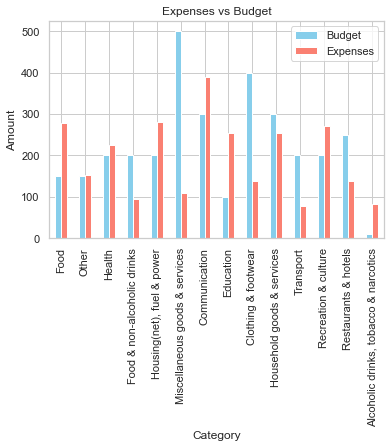


Congratulations! You are under the total budget.
However, you have exceeded the budget in the following categories:
- Food: Budget was 150.0, Expenses were 278.3, Over by 128.30
- Other: Budget was 150.0, Expenses were 151.8, Over by 1.80
- Health: Budget was 200.0, Expenses were 224.8, Over by 24.80
- Housing(net), fuel & power: Budget was 200.0, Expenses were 281.5, Over by 81.50
- Communication: Budget was 300.0, Expenses were 389.1, Over by 89.10
- Education: Budget was 100.0, Expenses were 255.3, Over by 155.30
- Recreation & culture: Budget was 200.0, Expenses were 271.2, Over by 71.20
- Alcoholic drinks, tobacco & narcotics: Budget was 10.0, Expenses were 83.4, Over by 73.40

Choose an option:
1: Pie Chart
2: Cumulative Spending Chart
3: Day-by-Day Expenses Line Chart
4: Compare Expenses with Budget
5: Exit


In [ ]:
#This function is the one for the user interaction

def main():
    # Load the original dataset from a CSV file
    
    df = read_dataset(ORIGINAL_FILE_PATH)

    #The code automatically showed the option "Other" as the first one. We did not want it so we change in order to have the category "Food" as the first one
    # Ensure 'Food' is the first category in the list for display purposes
    
    category_order = sorted(df['Category'].unique(), key=lambda x: (x != 'Food'))
    df['Category'] = pd.Categorical(df['Category'], categories=category_order, ordered=True)
    df = df.sort_values('Category')

    # Show the user a summary of last month's expenses by category
    
    display_expenses_summary(df)

    # Ask the user if they want to add more entries to the dataset
    
    while True:
        print("\nIs your dataset complete? (yes/no)")
        complete = input().lower()
        if complete == 'no':
            
            # If the dataset is not complete, allow the user to add new entries
        
            df = add_new_entry(df)
            
            # Save the updated dataset to a temporary file
            
            save_dataset(df, TEMP_FILE_PATH)
        elif complete == 'yes':
            
            # If the dataset is complete, exit the loop and move on
            
            break

    # Collect budget information from the user for the upcoming month
    
    categories = df['Category'].unique()
    budgets = collect_budget_data(categories)

    # Main interactive loop for the user to choose an action
    
    while True:
        print("\nChoose an option:")
        print("1: Pie Chart")
        print("2: Cumulative Spending Chart")
        print("3: Day-by-Day Expenses Line Chart")
        print("4: Compare Expenses with Budget")
        print("5: Exit")
        choice = input()

        # Based on the user's choice, perform an action or exit the program
        
        if choice == '1':
            plot_pie_chart(df)
        elif choice == '2':
            plot_cumulative_spending(df)
        elif choice == '3':
            plot_day_by_day_expenses(df)
        elif choice == '4':
            compare_budget_expenses(df, budgets)
        elif choice == '5':
            break
        else:
            
            # If the user makes an invalid choice, prompt them again
            
            print("Invalid choice. Please try again.")

# Run the program

main()
